In [ ]:
from google.colab import drive
drive.mount(r'/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Feynn Labs/ev/clean_data/three_wheelers_clean.csv")
data.head()

,name,brand,price,power,gvw,milage,engine,fuel_tank,payload,fuel_type
0,Bajaj Maxima Xl Cargo E-TEC 12.0,Bajaj,3.77,7.0,NaN,NaN,NaN,NaN,NaN,Electric
1,Piaggio Ape Xtra LDX,Piaggio,2.45,9.4,975.0,22.0,599.0,10.5,NaN,NaN
2,Bajaj Maxima C,Bajaj,2.83,10.0,965.0,33.0,470.5,8.0,NaN,Diesel
3,Mahindra Alfa Plus,Mahindra,2.59,9.0,995.0,29.4,597.0,NaN,505.0,Diesel
4,Mahindra Treo Zor,Mahindra,3.13,10.0,995.0,NaN,NaN,NaN,550.0,NaN


In [ ]:
data.isna().sum()

name          0
brand         0
price         0
power        21
gvw          30
milage       57
engine       55
fuel_tank    59
payload      25
fuel_type    40
dtype: int64

In [ ]:
data['power'].max()

17.0

In [ ]:
len(data)

73

In [ ]:
data.describe()

,price,power,gvw,milage,engine,fuel_tank,payload
count,73.000000,52.000000,43.000000,16.000000,18.000000,14.000000,48.000000
mean,2.193699,6.869038,864.139535,68.900000,463.694444,23.750000,495.645833
std,1.135560,4.753464,266.335501,35.468296,140.752480,14.999679,133.854079
min,0.590000,1.000000,211.000000,22.000000,225.800000,7.000000,290.000000
25%,1.240000,1.340000,727.500000,36.000000,395.000000,10.125000,400.000000
50%,2.070000,9.000000,960.000000,80.000000,450.250000,21.750000,500.000000
75%,3.120000,10.000000,995.500000,92.500000,597.925000,40.000000,505.250000
max,4.360000,17.000000,1413.000000,120.000000,599.000000,40.000000,1000.000000


In [ ]:
data.describe(include=['O']).T

,count,unique,top,freq
name,73,65,Mini Metro White E Rickshaw Loader,2
brand,73,28,Piaggio,7
fuel_type,33,3,Electric,25


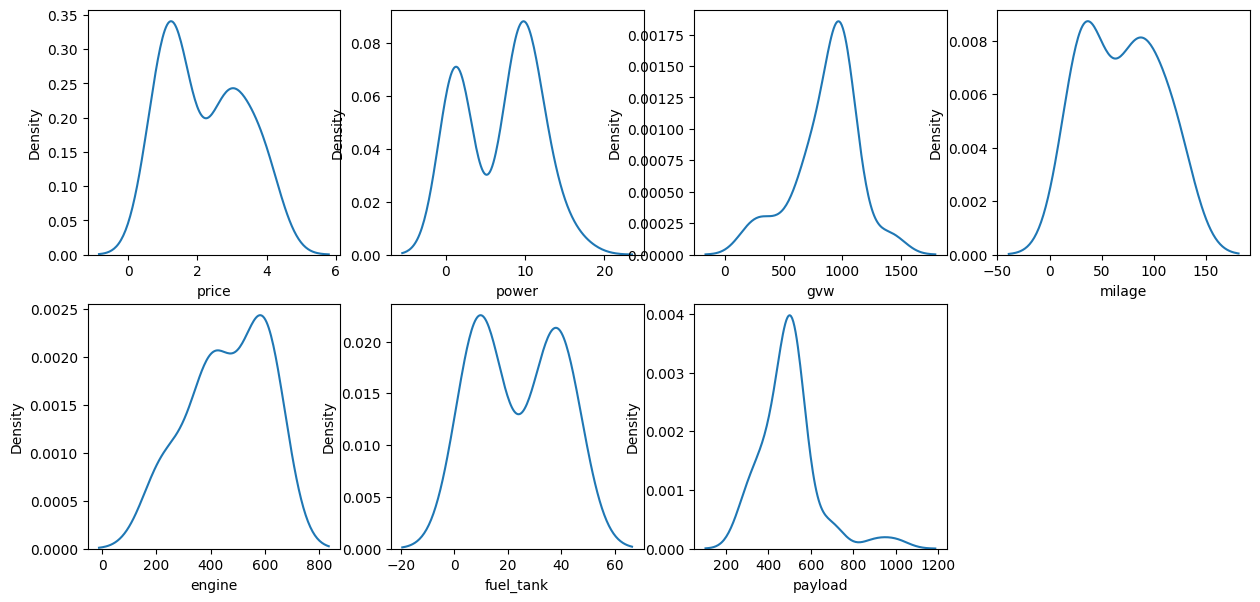

In [ ]:
column=data.describe().columns

i=1
plt.figure(figsize=(15,7))
for col in column:
  plt.subplot(2,4,i)
  sns.kdeplot(data[col])
  i+=1

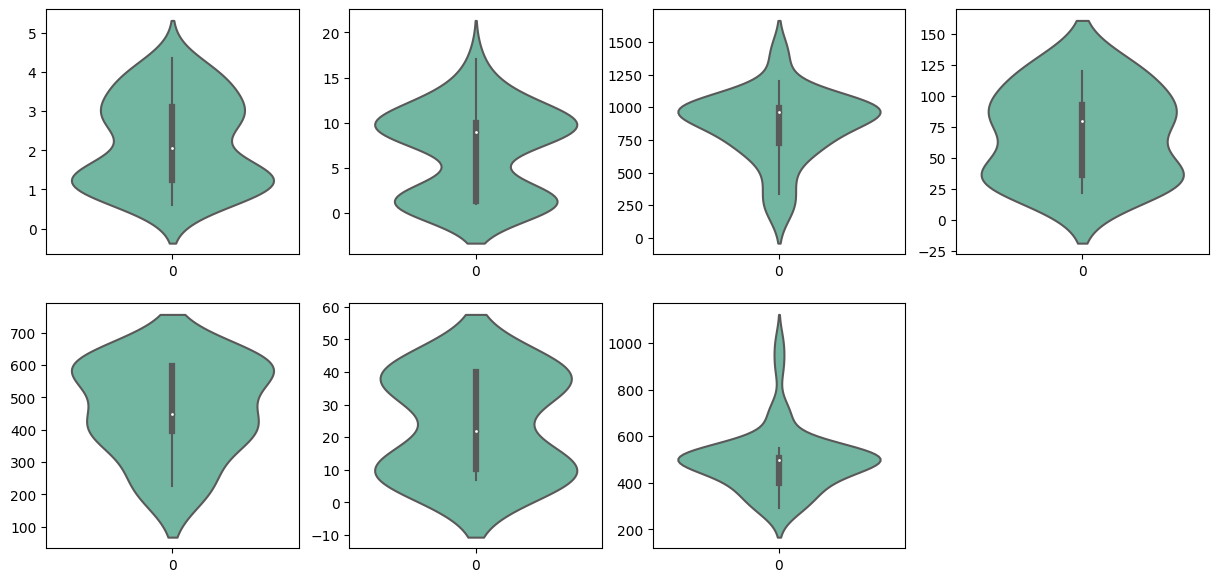

In [ ]:
sns.set_palette('Set2')
i=1
plt.figure(figsize=(15,7))
for col in column:
  plt.subplot(2,4,i)
  sns.violinplot(data[col])
  # ax[]
  i+=1

<ipython-input-13-90473d8600d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

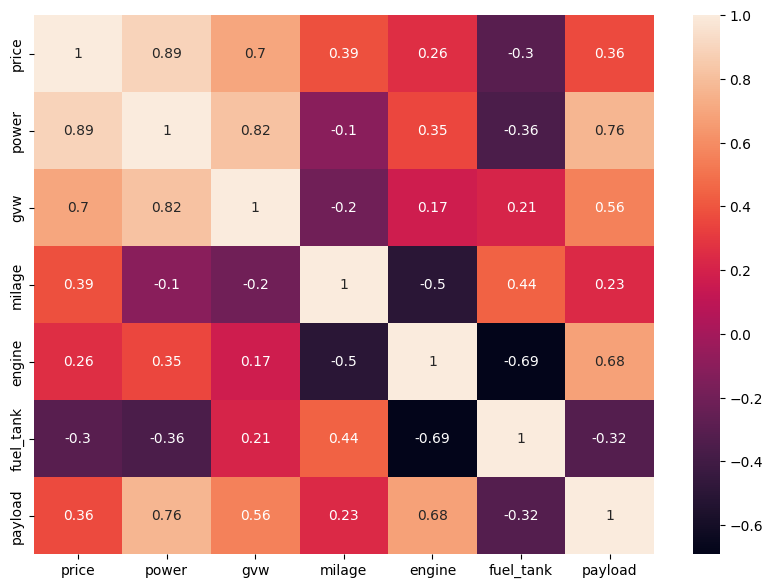

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

* price ---> power
* gvw ---> payload
* engine ---> gvw

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
# data['fuel_type_encode']=LabelEncoder().fit_transform(data['fuel_type'])
# data['brand_encode']=LabelEncoder().fit_transform(data['brand'])

imptr=IterativeImputer(max_iter=10)
impt_data=imptr.fit_transform(data[['price', 'power', 'gvw', 'engine', 'payload']])
impt_data=pd.DataFrame(impt_data,columns=['price', 'power', 'gvw', 'engine', 'payload'])
impt_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,price,power,gvw,engine,payload
0,3.77,7.0,869.596157,503.171983,489.647806
1,2.45,9.4,975.000000,599.000000,551.272245
2,2.83,10.0,965.000000,470.500000,497.482026
3,2.59,9.0,995.000000,597.000000,505.000000
4,3.13,10.0,995.000000,585.633372,550.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# data_driven_df=impt_data

data_driven=StandardScaler().fit_transform(impt_data)

pca=PCA()
pca_df=pca.fit_transform(data_driven)

pca_expl=pd.DataFrame()
pca_expl.index=['standard deviation','proportion of variance','cumulative proportion']

for i in range(len(impt_data.columns)):
      pca_expl[f'PC{i+1}']=None

# standard deviation
pca_expl.loc['standard deviation']=np.sqrt(pca.explained_variance_)
#proportion of variance
pca_expl.loc['proportion of variance']=pca.explained_variance_ratio_
# For cumulative proportion we use list comprehesion
temp=pca.explained_variance_ratio_
coml=[sum(temp[:i]) for i in range(1,len(temp)+1)]
pca_expl.loc['cumulative proportion']=coml
pca_expl

,PC1,PC2,PC3,PC4,PC5
standard deviation,1.830069,1.136722,0.590698,0.26182,0.103356
proportion of variance,0.660654,0.254887,0.068829,0.013522,0.002107
cumulative proportion,0.660654,0.915542,0.984371,0.997893,1.0


In [ ]:
# Expaining components
pca_cmp=pd.DataFrame()
pca_cmp.index=impt_data.columns
for i in range(len(impt_data.columns)):
    pca_cmp[f'PC{i+1}']=pca.components_[i]
pca_cmp

,PC1,PC2,PC3,PC4,PC5
price,0.382712,-0.570163,0.489578,-0.535153,0.048691
power,0.500922,-0.310676,0.122709,0.796693,-0.052730
gvw,0.486135,-0.113108,-0.757473,-0.255244,-0.334612
engine,0.363744,0.627358,0.409575,-0.083362,-0.547185
payload,0.483706,0.414757,-0.061155,-0.082418,0.763853


In [ ]:
!pip install bioinfokit clustergram urbangrammar-graphics pacmap

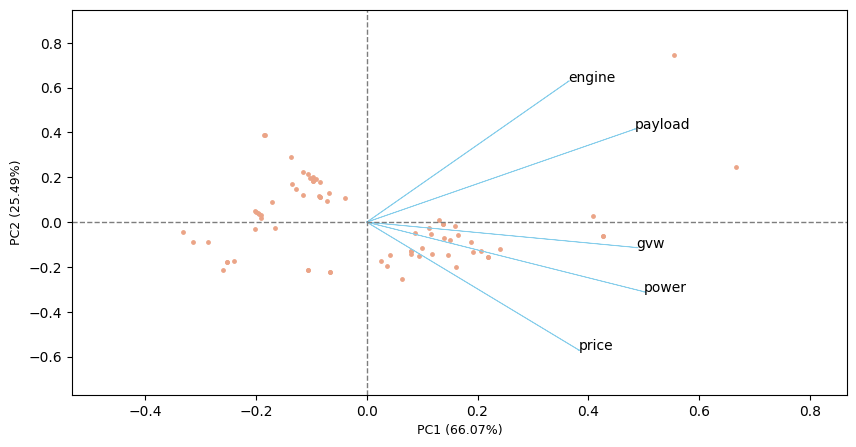

In [ ]:
from bioinfokit.visuz import cluster
# get 2D biplot
cluster.biplot(cscore=pca_df, loadings=pca.components_, labels=impt_data.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

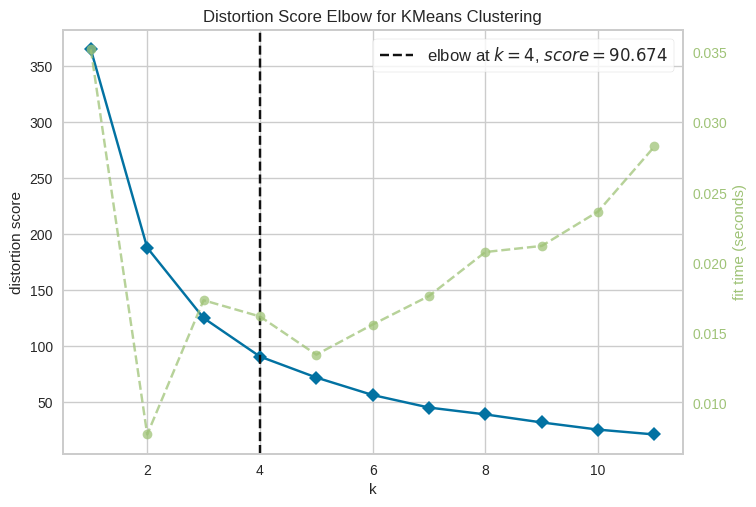

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# data_driven_f=pd.DataFrame(data_driven)
k=0
km = KMeans(n_clusters=k,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
#                 random_state=42,
                algorithm='auto')
visualizer = KElbowVisualizer(km, k=(1,12)).fit(data_driven)
visualizer.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.010 seconds.
K=3 fitted in 0.013 seconds.
K=4 fitted in 0.014 seconds.
K=5 fitted in 0.016 seconds.
K=6 fitted in 0.018 seconds.
K=7 fitted in 0.027 seconds.
K=8 fitted in 0.024 seconds.
K=9 fitted in 0.023 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

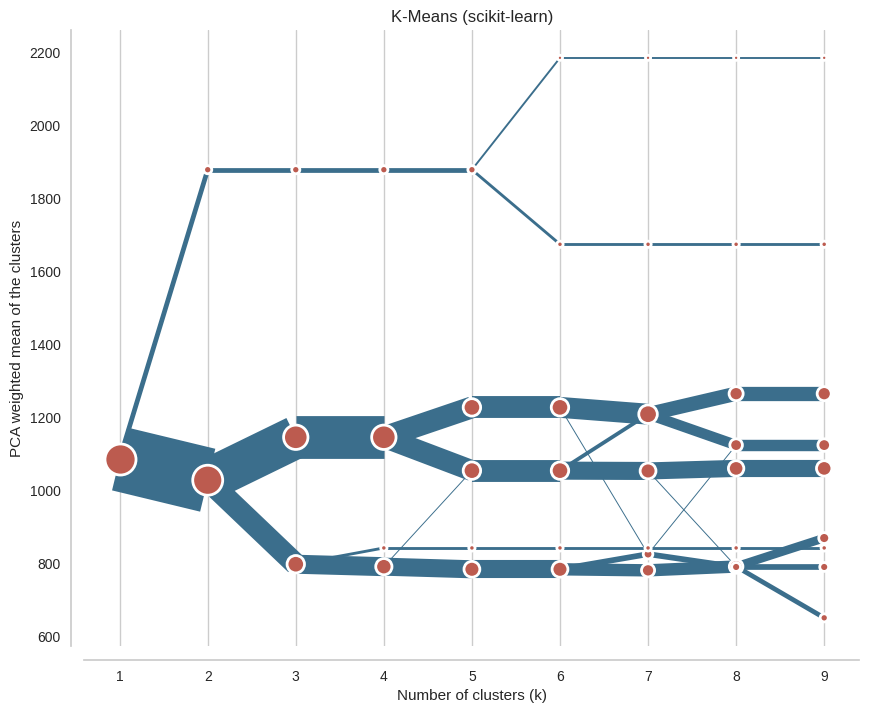

In [ ]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg
cgram = Clustergram(range(1, 10), n_init=10)
cgram.fit(impt_data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

In [ ]:
# Assign lable
km = KMeans(n_clusters=4,
            max_iter=300,
            tol=1e-04,
            init='k-means++',
            n_init=10,
            # random_state=42,
            algorithm='auto')
km.fit(impt_data)
impt_data['cluster']=km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
# Sandardise data
X_std=StandardScaler().fit_transform(impt_data.drop('cluster',axis=1))

X_mean = pd.concat([pd.DataFrame(impt_data.mean().drop('cluster'), columns=['mean']),
                   impt_data.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(impt_data.mean().drop('cluster'), columns=['mean']),
                   impt_data.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

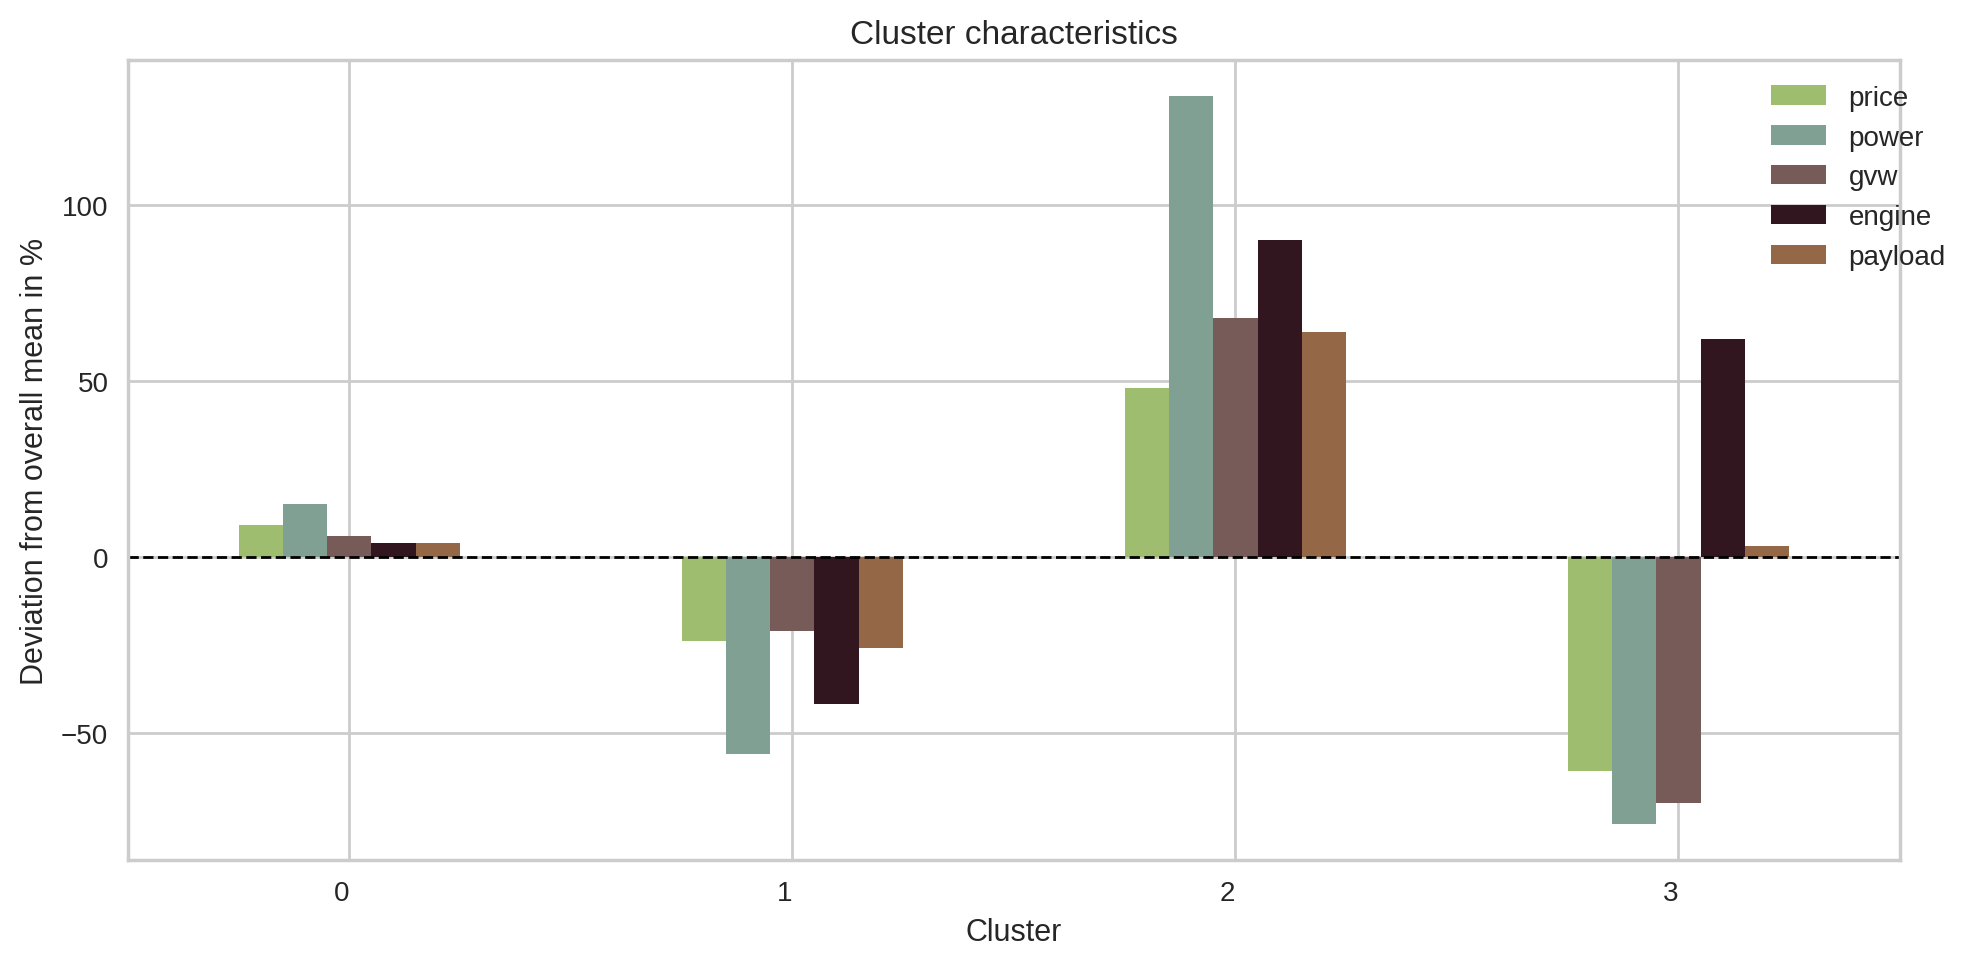

In [ ]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

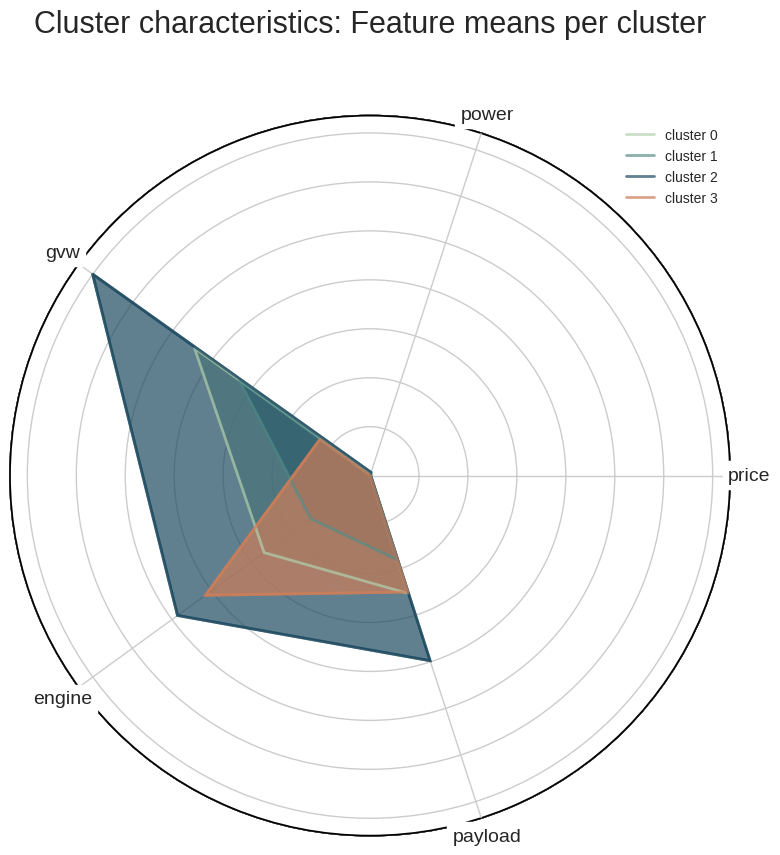

In [ ]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(km.feature_names_in_)
radar = Radar(fig, km.feature_names_in_, np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
# impt_data[impt_data['cluster']==2]

In [ ]:
df_fuel=pd.concat([impt_data,data[['brand', 'fuel_type', 'payload']]], axis=1)
# df_fuel.head()
df_fuel.columns=['price',	'power',	'gvw',	'engine',	'payload_imp','cluster', 'brand', 'fuel_type', 'payload']

In [ ]:
# df_fuel.describe(include=['int64','float64'])

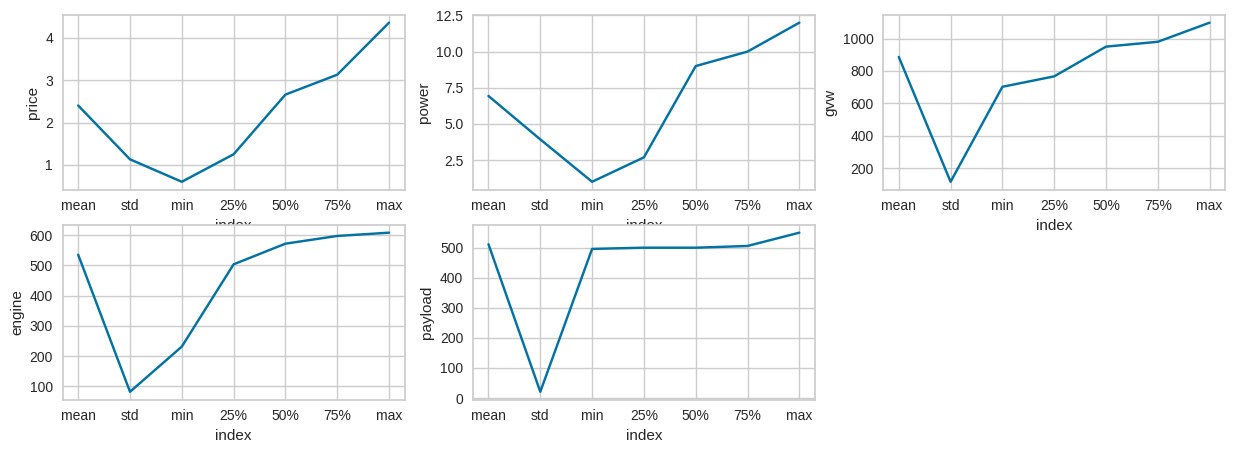

In [ ]:
# Describing Segment 1
describe_num_df = df_fuel[df_fuel['cluster']==0].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

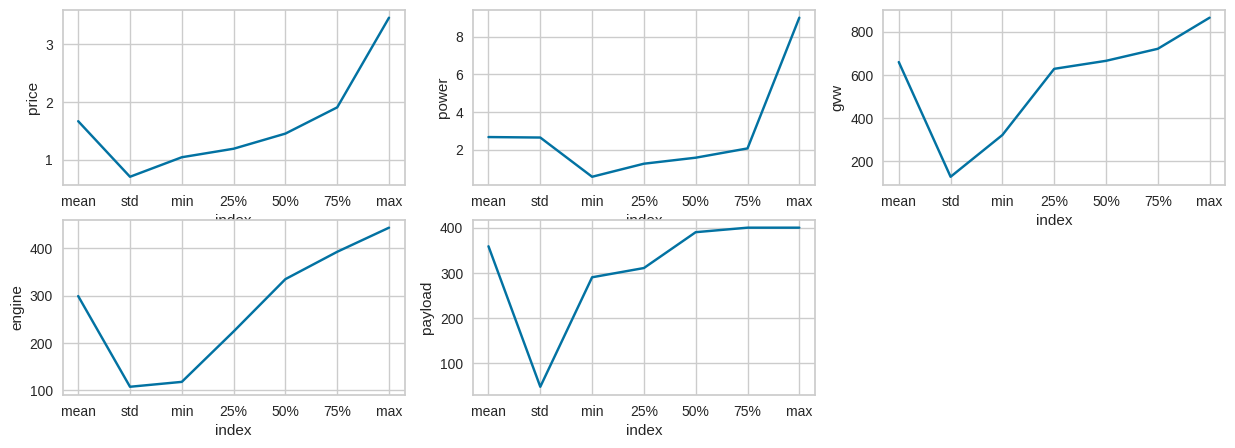

In [ ]:
# Describing Segment 2
describe_num_df = df_fuel[df_fuel['cluster']==1].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

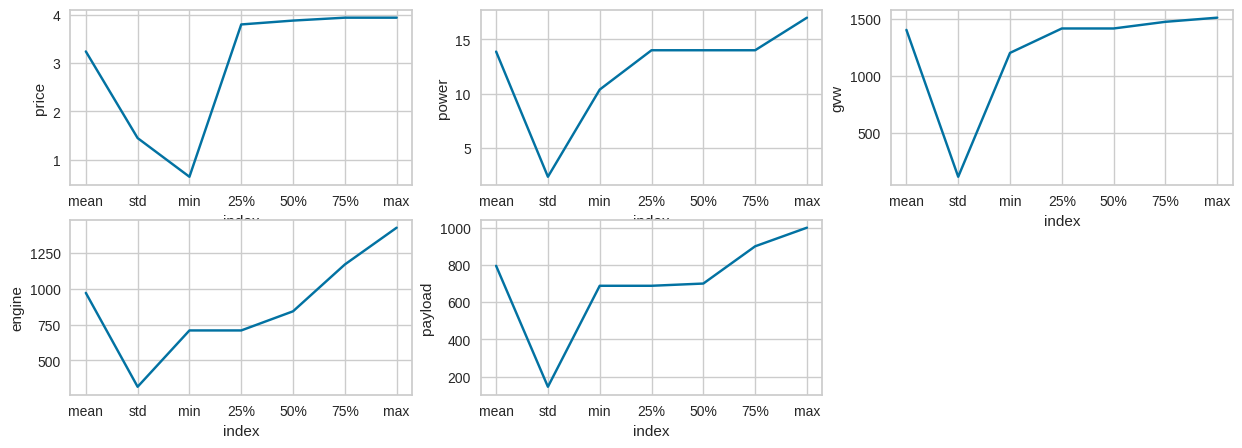

In [ ]:
# Describing Segment 3
describe_num_df = df_fuel[df_fuel['cluster']==2].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

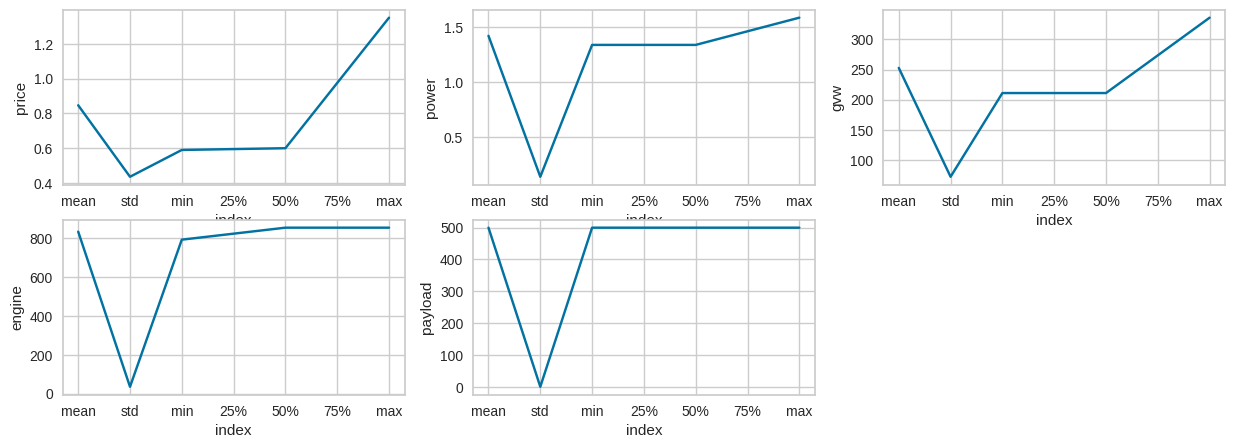

In [ ]:
# Describing Segment 4
describe_num_df = df_fuel[df_fuel['cluster']==3].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

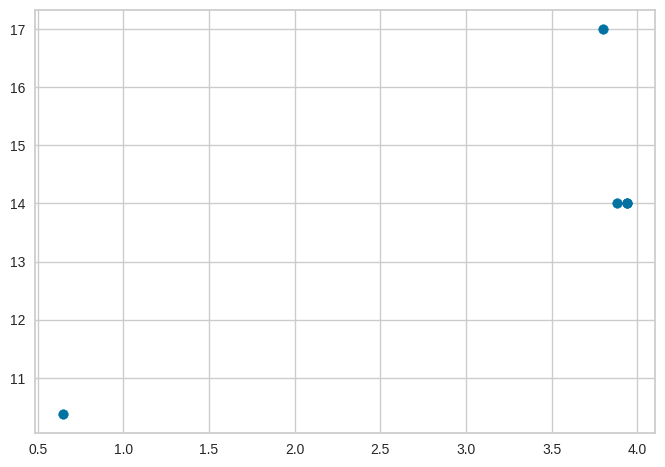

In [ ]:
# plt.scatter(x=segmrnt_3['price'], y=segmrnt_3['power'])

In [ ]:
df_fuel['payload'].describe()

,payload,payload
count,73.000000,48.000000
mean,486.072106,495.645833
std,116.197244,133.854079
min,290.000000,290.000000
25%,400.000000,400.000000
50%,500.000000,500.000000
75%,505.000000,505.250000
max,1000.000000,1000.000000
